<a href="https://colab.research.google.com/github/noayarae/Empirical_mode_decomposition/blob/main/Empirical_Mode_Decomposition_enoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# To open your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

(496,) (496, 1)


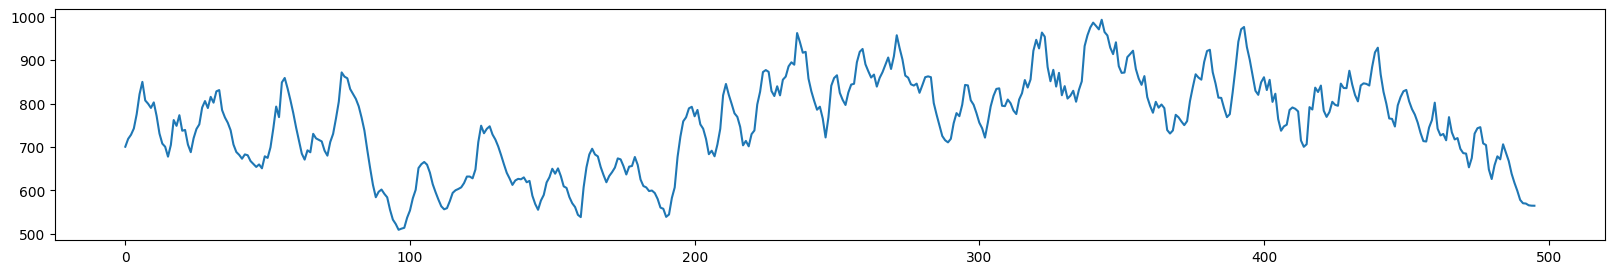

In [30]:
from pandas import read_csv
#series = read_csv('D:/work/research_t/pp_02/supplementary/time_series_data.csv', header=0, index_col=0)  # From local folder
series = read_csv('/content/drive/MyDrive/5000_data/003_340_ts_data_for_decomp_v1.csv', header=0, index_col=0)  # From Google Drive
site = 'S_369' #'S_369' # 'S_432' # 'S_21928' #  'S_21928' #'S_21581' # 'S_445' #  'S_376' # 'S_21594' #  'S_21661' #  'S_21892' #  'S_21917' # 'S_21933' # 'S_446' #               #  ----> SET
#site='S_rand2'#'S_sin_1p'#'S_sin_2p','S_sin_3p','S_sin_3p_100r','S_sin_3p_250r','S_sin_3p_500r','S_sin_3p_750r','S_sin_3p_1000r_a','S_sin_3p_1000r_b','S_rand1','S_rand2'

data = series[site].values
dd = data.reshape(496,1)
print(data.shape, dd.shape)

plt.figure(figsize = (20,3))
plt.plot(dd)
plt.show()

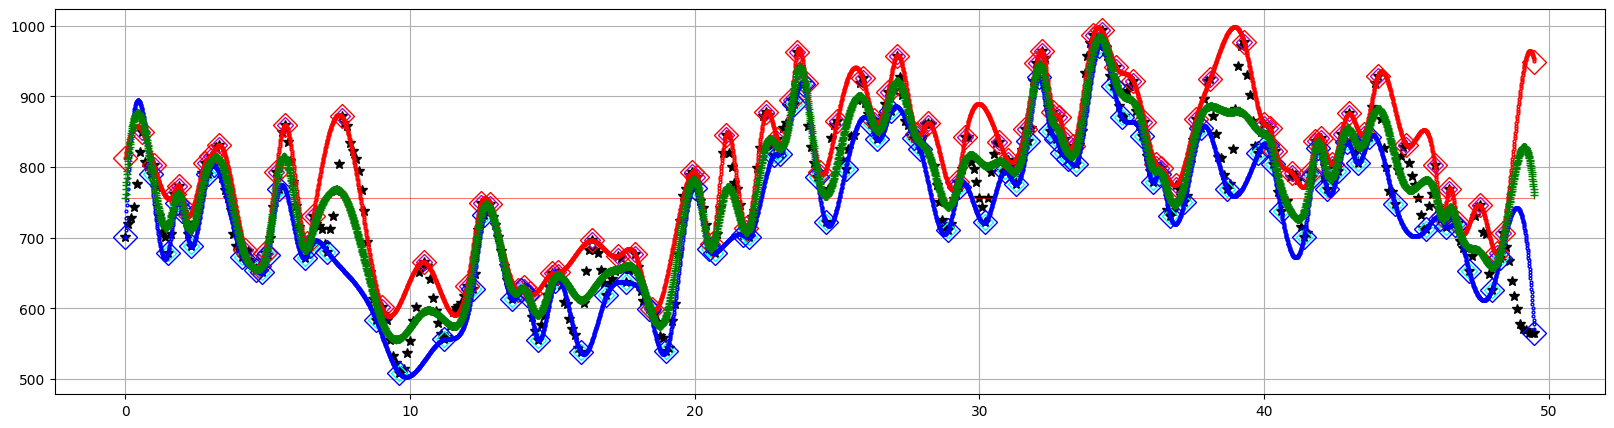

In [31]:
np.random.seed(2) # For reproducibility
nn = 496
yy = data #np.random.randn(nn)  # np.random.randn(50)
avg_y = np.mean(yy)
xx = np.arange(0, nn/10, 0.1) # np.arange(0, 5, 0.1)
up_ids, _ = find_peaks(yy)      # Get indexes of up-peaks     Ref.: https://docs.scipy.org/doc/scipy/reference/signal.html
up_vals = yy[up_ids]            # Get peak values
low_ids, _ = find_peaks(-yy)    # Get indexes of low-peaks
low_vals = yy[low_ids]          # Get low peaks

### Routines to add first and last values to up- and low-peaks
dd1 = abs(yy[0]-avg_y)
if yy[0]>avg_y:           # If the first-val > average
  upv = np.append(yy[0],up_vals)          # The first-val is add as the first up-peak
  lwv = np.append(yy[0]-2*dd1, low_vals)  # The first-val of low-peaks is computed approximately
else:                     # If the first-val < average
  lwv = np.append(yy[0],low_vals)         # The first-val is add as the first low-peak
  upv = np.append(yy[0]+2*dd1, up_vals)   # The first-val of up-peaks is computed approximately
uid = np.append(0, up_ids)
lid = np.append(0, low_ids)

dd2 = abs(yy[-1]-avg_y)
if yy[-1]>avg_y: # yy[-1]>yy[-2]:   # If the last-val > average
  upv = np.append(upv,yy[-1])           # The last-val is add as the last up-peak
  lwv = np.append(lwv, yy[-1]-2*dd2)    # The last-val of low-peaks is computed
else:                               # If the last-val < average
  lwv = np.append(lwv,yy[-1])           # The last-val is add as the last low-peak
  upv = np.append(upv, yy[-1]+2*dd2)    # The last-val of up-peaks is computed
uid = np.append(uid, nn-1)    # np.append(uid, 49)
lid = np.append(lid, nn-1)    # np.append(uid, 49)
# ----------------------------------------------------------------
# Ref.: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
f1m = interp1d(xx[uid], upv, kind = 'cubic', fill_value = 'extrapolate')  # object function for up-peak interpolation
f2m = interp1d(xx[lid], lwv, kind = 'cubic', fill_value = 'extrapolate')  # object function for low-peak interpolation
xn = np.arange(0, (nn-1)/10, 0.01) # np.arange(0, 4.9, 0.01)          # Create array of point to interpolate
yn_max = f1m(xn)
yn_min = f2m(xn)

#print(up_ids) # print(up_vals) #
#print(low_ids) # print(low_vals) #

plt.figure(figsize = (20,5))
plt.plot(xx, yy, '*', markersize=7, c='k')                                 # Plot raw values
plt.plot(xx, [avg_y]*nn, '-', c='r', linewidth=0.4)                         # Plot mean (hor-line)
plt.plot(xx[up_ids], up_vals, 'D', mfc='none', markersize=8, c='m')         # plot raw up-peaks
plt.plot(xx[low_ids], low_vals, 'D', mfc='none', markersize=8, c='cyan')       # plot raw low-peaks

plt.plot(xx[uid], upv, 'D', mfc='none', markersize=12, c='red')            # plot completed up-peaks
plt.plot(xx[lid], lwv, 'D', mfc='none', markersize=12, c='blue')            # plot completed low-peaks
plt.plot(xn, yn_max, 'o', mfc='none', markersize=2, c='red', linewidth=0.5) # plot interpolated up-peaks
plt.plot(xn, yn_min, 'o', mfc='none', markersize=2, c='blue', linewidth=0.5)     # plot interpolated low-peaks
plt.plot(xn, (yn_max+yn_min)/2, '+', mfc='none', markersize=6, c='g', linewidth=1) # plot interpolated mean-values
plt.grid()
#plt.xlim(-0.2,1)
plt.show()

[]

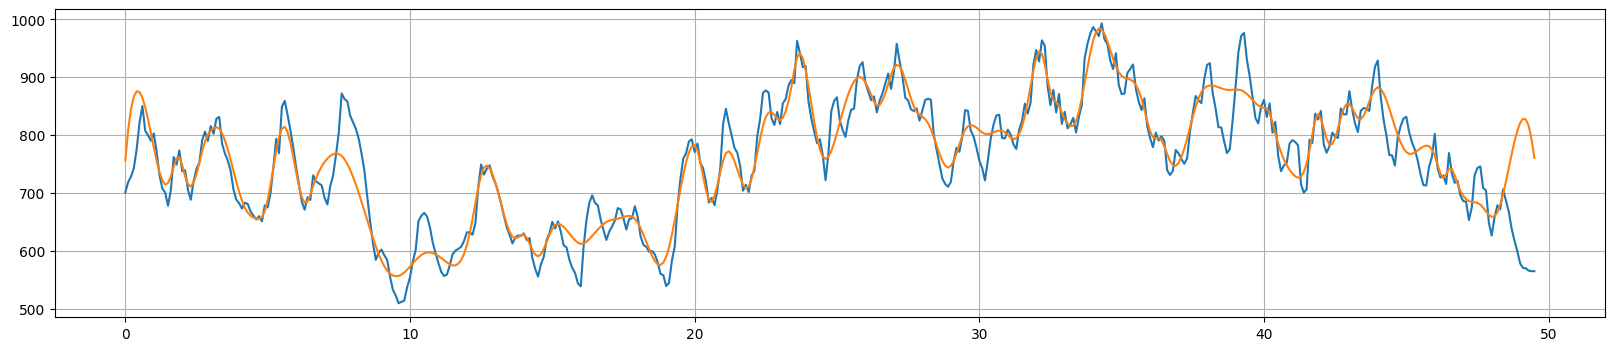

In [32]:
new_idx = list(range(0, (nn-1)*10,10)) # list(range(0, 490,10))          # Get indexes to get values from average ts
avge_ts = (yn_max+yn_min)/2                                   # average values of up-peaks and low-peaks
dnoised_ts = avge_ts[new_idx]                                 # Get new denoised time-series with ONE less value
dnoised_ts = np.append(dnoised_ts,avge_ts[-1])  # Add one value to the denoised time-series
#print(dnoised_ts.tolist())
#print(len(dnoised_ts))

### Plot noisy and denoised values
plt.figure(figsize = (20,4))
plt.plot(xx, yy, '-', markersize=8)           # Noisy values
plt.plot(xx, dnoised_ts, '-', markersize=6)   # Denoised values
plt.grid()
plt.plot()

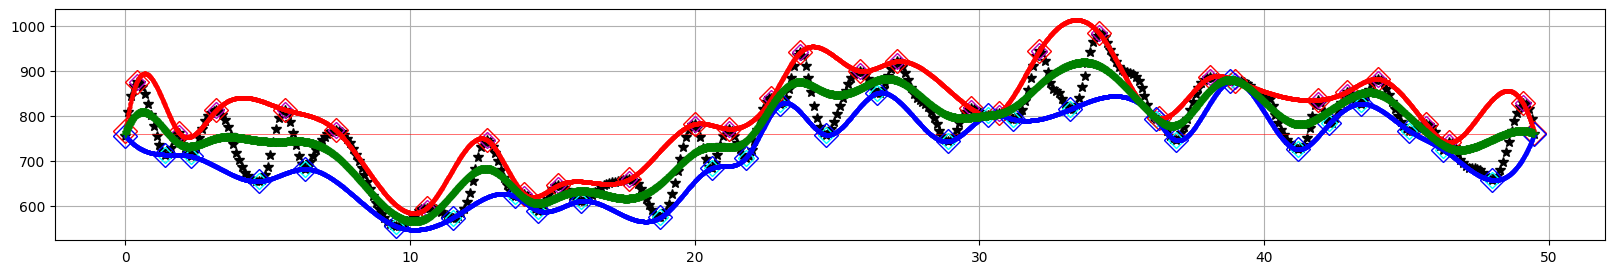

In [33]:
np.random.seed(2) # For reproducibility
nn = 496
yy = dnoised_ts# np.random.randn(nn)  # np.random.randn(50)
avg_y = np.mean(yy)
xx = np.arange(0, nn/10, 0.1) # np.arange(0, 5, 0.1)
up_ids, _ = find_peaks(yy)      # Get indexes of up-peaks     Ref.: https://docs.scipy.org/doc/scipy/reference/signal.html
up_vals = yy[up_ids]            # Get peak values
low_ids, _ = find_peaks(-yy)    # Get indexes of low-peaks
low_vals = yy[low_ids]          # Get low peaks

### Routines to add first and last values to up- and low-peaks
dd1 = abs(yy[0]-avg_y)
if yy[0]>avg_y:           # If the first-val > average
  upv = np.append(yy[0],up_vals)          # The first-val is add as the first up-peak
  lwv = np.append(yy[0]-2*dd1, low_vals)  # The first-val of low-peaks is computed approximately
else:                     # If the first-val < average
  lwv = np.append(yy[0],low_vals)         # The first-val is add as the first low-peak
  upv = np.append(yy[0]+2*dd1, up_vals)   # The first-val of up-peaks is computed approximately
uid = np.append(0, up_ids)
lid = np.append(0, low_ids)

dd2 = abs(yy[-1]-avg_y)
if yy[-1]>avg_y: # yy[-1]>yy[-2]:   # If the last-val > average
  upv = np.append(upv,yy[-1])           # The last-val is add as the last up-peak
  lwv = np.append(lwv, yy[-1]-2*dd2)    # The last-val of low-peaks is computed
else:                               # If the last-val < average
  lwv = np.append(lwv,yy[-1])           # The last-val is add as the last low-peak
  upv = np.append(upv, yy[-1]+2*dd2)    # The last-val of up-peaks is computed
uid = np.append(uid, nn-1)    # np.append(uid, 49)
lid = np.append(lid, nn-1)    # np.append(uid, 49)
# ----------------------------------------------------------------
# Ref.: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
f1m = interp1d(xx[uid], upv, kind = 'cubic', fill_value = 'extrapolate')  # object function for up-peak interpolation
f2m = interp1d(xx[lid], lwv, kind = 'cubic', fill_value = 'extrapolate')  # object function for low-peak interpolation
xn = np.arange(0, (nn-1)/10, 0.01) # np.arange(0, 4.9, 0.01)          # Create array of point to interpolate
yn_max = f1m(xn)
yn_min = f2m(xn)

#print(up_ids) # print(up_vals) #
#print(low_ids) # print(low_vals) #

plt.figure(figsize = (20,3))
plt.plot(xx, yy, '*', markersize=7, c='k')                                 # Plot raw values
plt.plot(xx, [avg_y]*nn, '-', c='r', linewidth=0.4)                         # Plot mean (hor-line)
plt.plot(xx[up_ids], up_vals, 'D', mfc='none', markersize=8, c='m')         # plot raw up-peaks
plt.plot(xx[low_ids], low_vals, 'D', mfc='none', markersize=8, c='cyan')       # plot raw low-peaks

plt.plot(xx[uid], upv, 'D', mfc='none', markersize=12, c='red')            # plot completed up-peaks
plt.plot(xx[lid], lwv, 'D', mfc='none', markersize=12, c='blue')            # plot completed low-peaks
plt.plot(xn, yn_max, 'o', mfc='none', markersize=2, c='red', linewidth=0.5) # plot interpolated up-peaks
plt.plot(xn, yn_min, 'o', mfc='none', markersize=2, c='blue', linewidth=0.5)     # plot interpolated low-peaks
plt.plot(xn, (yn_max+yn_min)/2, '+', mfc='none', markersize=6, c='g', linewidth=1) # plot interpolated mean-values
plt.grid()
#plt.xlim(-0.2,1)
plt.show()

[]

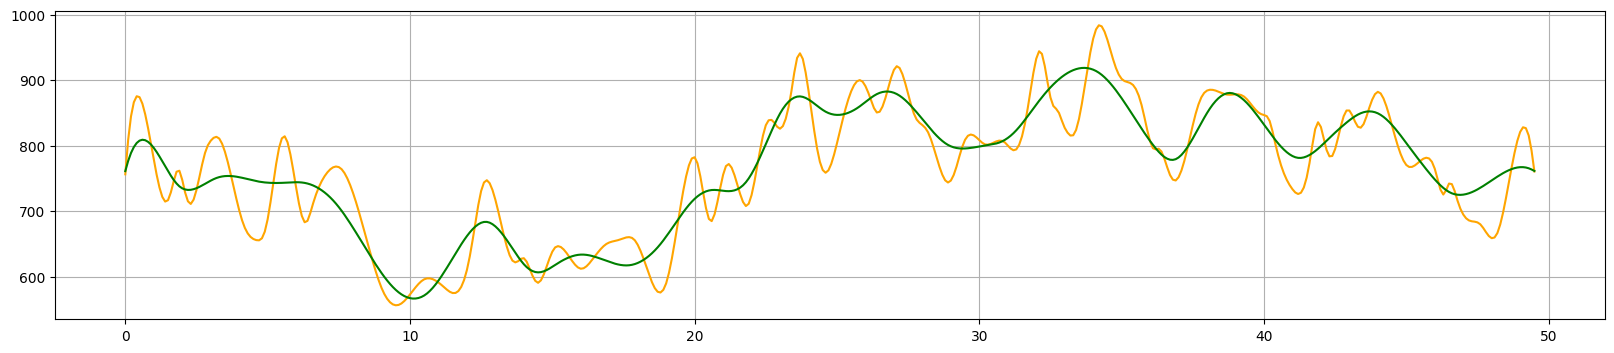

In [34]:
new_idx = list(range(0, (nn-1)*10,10)) # list(range(0, 490,10))          # Get indexes to get values from average ts
avge_ts = (yn_max+yn_min)/2                                   # average values of up-peaks and low-peaks
dnoised_ts = avge_ts[new_idx]                                 # Get new denoised time-series with ONE less value
dnoised_ts = np.append(dnoised_ts,avge_ts[-1])  # Add one value to the denoised time-series
#print(dnoised_ts.tolist())
#print(len(dnoised_ts))

### Plot noisy and denoised values
plt.figure(figsize = (20,4))
plt.plot(xx, yy, '-', markersize=8, c='orange')           # Noisy values
plt.plot(xx, dnoised_ts, '-', markersize=6, c='green')   # Denoised values
plt.grid()
plt.plot()

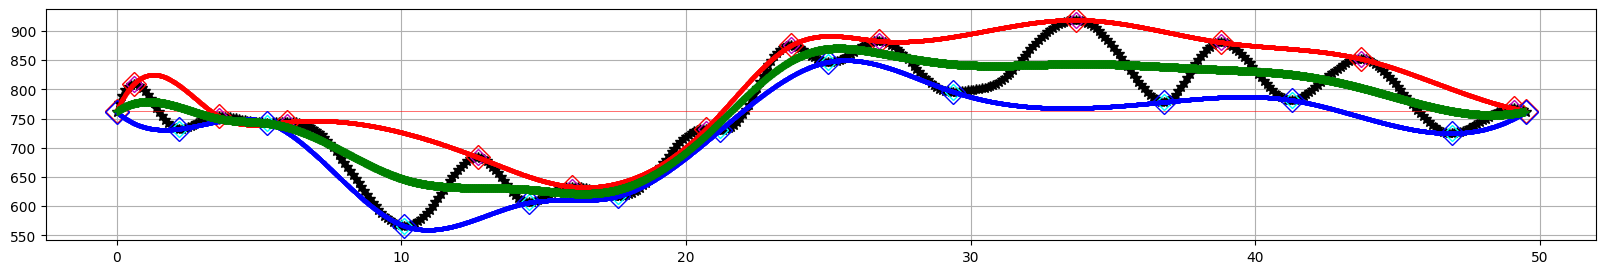

In [35]:
np.random.seed(2) # For reproducibility
nn = 496
yy = dnoised_ts# np.random.randn(nn)  # np.random.randn(50)
avg_y = np.mean(yy)
xx = np.arange(0, nn/10, 0.1) # np.arange(0, 5, 0.1)
up_ids, _ = find_peaks(yy)      # Get indexes of up-peaks     Ref.: https://docs.scipy.org/doc/scipy/reference/signal.html
up_vals = yy[up_ids]            # Get peak values
low_ids, _ = find_peaks(-yy)    # Get indexes of low-peaks
low_vals = yy[low_ids]          # Get low peaks

### Routines to add first and last values to up- and low-peaks
dd1 = abs(yy[0]-avg_y)
if yy[0]>avg_y:           # If the first-val > average
  upv = np.append(yy[0],up_vals)          # The first-val is add as the first up-peak
  lwv = np.append(yy[0]-2*dd1, low_vals)  # The first-val of low-peaks is computed approximately
else:                     # If the first-val < average
  lwv = np.append(yy[0],low_vals)         # The first-val is add as the first low-peak
  upv = np.append(yy[0]+2*dd1, up_vals)   # The first-val of up-peaks is computed approximately
uid = np.append(0, up_ids)
lid = np.append(0, low_ids)

dd2 = abs(yy[-1]-avg_y)
if yy[-1]>avg_y: # yy[-1]>yy[-2]:   # If the last-val > average
  upv = np.append(upv,yy[-1])           # The last-val is add as the last up-peak
  lwv = np.append(lwv, yy[-1]-2*dd2)    # The last-val of low-peaks is computed
else:                               # If the last-val < average
  lwv = np.append(lwv,yy[-1])           # The last-val is add as the last low-peak
  upv = np.append(upv, yy[-1]+2*dd2)    # The last-val of up-peaks is computed
uid = np.append(uid, nn-1)    # np.append(uid, 49)
lid = np.append(lid, nn-1)    # np.append(uid, 49)
# ----------------------------------------------------------------
# Ref.: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
f1m = interp1d(xx[uid], upv, kind = 'cubic', fill_value = 'extrapolate')  # object function for up-peak interpolation
f2m = interp1d(xx[lid], lwv, kind = 'cubic', fill_value = 'extrapolate')  # object function for low-peak interpolation
xn = np.arange(0, (nn-1)/10, 0.01) # np.arange(0, 4.9, 0.01)          # Create array of point to interpolate
yn_max = f1m(xn)
yn_min = f2m(xn)

#print(up_ids) # print(up_vals) #
#print(low_ids) # print(low_vals) #

plt.figure(figsize = (20,3))
plt.plot(xx, yy, '*', markersize=7, c='k')                                 # Plot raw values
plt.plot(xx, [avg_y]*nn, '-', c='r', linewidth=0.4)                         # Plot mean (hor-line)
plt.plot(xx[up_ids], up_vals, 'D', mfc='none', markersize=8, c='m')         # plot raw up-peaks
plt.plot(xx[low_ids], low_vals, 'D', mfc='none', markersize=8, c='cyan')       # plot raw low-peaks

plt.plot(xx[uid], upv, 'D', mfc='none', markersize=12, c='red')            # plot completed up-peaks
plt.plot(xx[lid], lwv, 'D', mfc='none', markersize=12, c='blue')            # plot completed low-peaks
plt.plot(xn, yn_max, 'o', mfc='none', markersize=2, c='red', linewidth=0.5) # plot interpolated up-peaks
plt.plot(xn, yn_min, 'o', mfc='none', markersize=2, c='blue', linewidth=0.5)     # plot interpolated low-peaks
plt.plot(xn, (yn_max+yn_min)/2, '+', mfc='none', markersize=6, c='g', linewidth=1) # plot interpolated mean-values
plt.grid()
#plt.xlim(-0.2,1)
plt.show()

[]

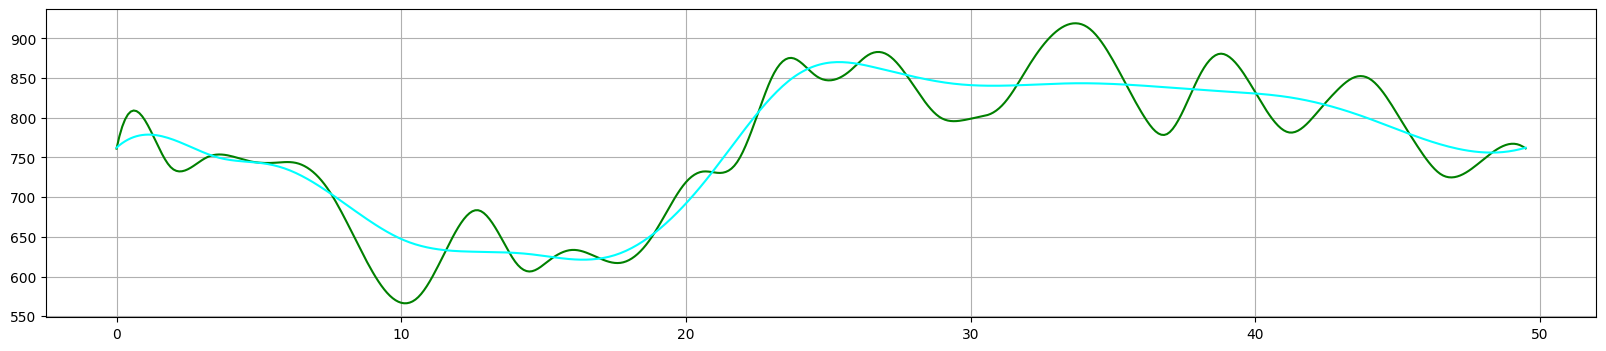

In [36]:
new_idx = list(range(0, (nn-1)*10,10)) # list(range(0, 490,10))          # Get indexes to get values from average ts
avge_ts = (yn_max+yn_min)/2                                   # average values of up-peaks and low-peaks
dnoised_ts = avge_ts[new_idx]                                 # Get new denoised time-series with ONE less value
dnoised_ts = np.append(dnoised_ts,avge_ts[-1])  # Add one value to the denoised time-series
#print(dnoised_ts.tolist())
#print(len(dnoised_ts))

### Plot noisy and denoised values
plt.figure(figsize = (20,4))
plt.plot(xx, yy, '-', markersize=8, c='green')           # Noisy values
plt.plot(xx, dnoised_ts, '-', markersize=6, c='cyan')   # Denoised values
plt.grid()
plt.plot()